In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para o pré-processamento e modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [3]:
df = pd.read_csv('World Energy Consumption.csv')

In [4]:
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [5]:
df.dropna(inplace=True)

In [6]:
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,United States,2014,USA,322033952.0,1.648266e+13,1.432,5.089,1119.494,360.515,198.706,...,0.706,0.304,8.231,35.039,497.093,564.071,181.65,1543.604,4.435,1.912
20703,United States,2015,USA,324607776.0,1.690258e+13,4.631,16.696,1162.053,377.211,196.021,...,0.956,0.412,4.989,21.695,518.788,587.540,190.72,1598.198,4.670,2.015
20704,United States,2016,USA,327210208.0,1.716256e+13,8.488,32.017,1250.661,409.229,191.803,...,1.342,0.577,19.020,95.018,613.806,693.713,226.99,1875.876,5.553,2.386
20705,United States,2017,USA,329791232.0,1.759628e+13,0.202,0.825,1243.373,410.054,190.211,...,1.907,0.805,12.031,69.804,683.609,771.094,254.30,2072.855,6.275,2.648


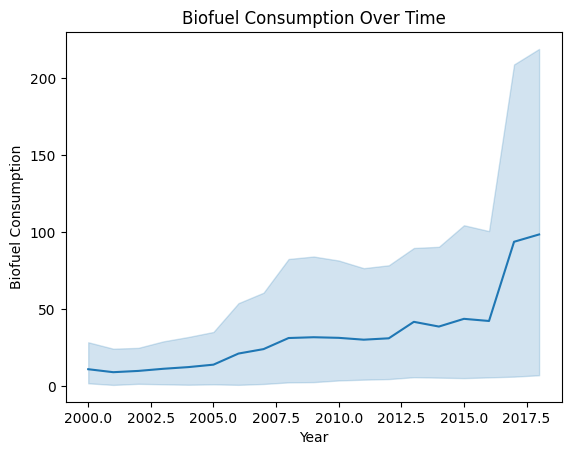

In [12]:

sns.lineplot(x='year', y='biofuel_consumption', data=df)
plt.title('Biofuel Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Biofuel Consumption')
plt.show()

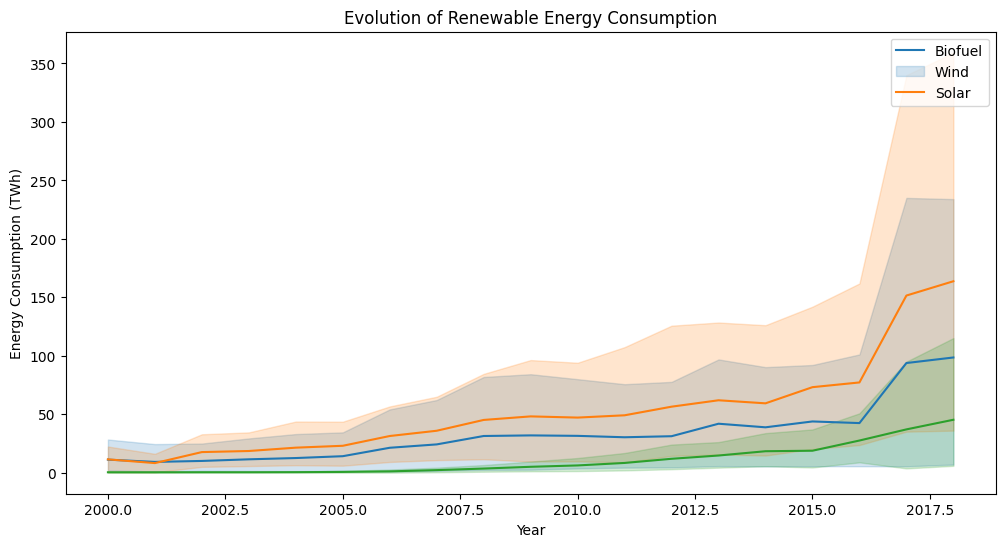

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='biofuel_consumption', data=df)
sns.lineplot(x='year', y='wind_consumption', data=df)
sns.lineplot(x='year', y='solar_consumption', data=df)
plt.title('Evolution of Renewable Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend(['Biofuel', 'Wind', 'Solar'])
plt.show()



In [8]:
X = df[['biofuel_elec_per_capita', 'wind_elec_per_capita']]
y = df['population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [11]:
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R²:', r2)

MSE: 5707866917199041.0
R²: -0.06569954804288258
